In [1]:
import numpy as np
import matplotlib.pyplot as p

In [45]:
N = 4000
x = np.linspace(0,20*np.pi,N)
signal1 = np.sin(x)
signal2 = 0.5*np.sin(10*x)
signal3 = 0.3*np.sin(80*x)
noise = 2*(np.random.random_sample(N)-0.5)
signal = signal1 + signal2 + signal3
signal += noise

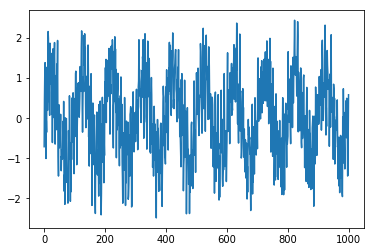

In [13]:
p.plot(signal)

In [35]:
def dft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = np.zeros((N,N),dtype="complex_")
    np.exp(-1j*2*np.pi/N*np.triu(n_mat*k_mat), out=exp_mat)
    exp_mat = exp_mat + exp_mat.T - np.diag(exp_mat.diagonal())
    vt = np.matmul(exp_mat,v)
    return vt

def dft_lm(v):
    #low(er) memory dft
    N = len(v)
    vt = np.zeros(N,dtype="complex_")
    n_vec = np.arange(N)
    exp_vec = np.exp(-1j*2*np.pi/N*n_vec)
    #for n in np.arange(N):
        #for k in np.arange(N):
            #vt[k] += exp_vec[np.mod(n*k,N, dtype=np.intp)]*v[n]
    for k in np.arange(N):
        vt[k] = np.dot(exp_vec[np.mod(n_vec*k,N, dtype=np.intp)],v)
    return vt

def qdft(v):
    #maybe quicker dft
    N = len(v)
    n_vec = np.arange(N)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    vt = np.zeros(N,dtype="complex_")
    exp_mat = np.zeros((N,N),dtype="complex_")
    exp_vec = np.exp(-1j*2*np.pi/N*n_vec)
    ind_mat = np.mod(n_mat*k_mat, N, dtype=np.intp)
    exp_mat = exp_vec[ind_mat]
    vt = np.matmul(exp_mat,v)
    return vt

def idft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = 1/N*np.exp(1j*2*np.pi/N*n_mat*k_mat)
    vt = np.matmul(exp_mat,v)
    return vt

In [36]:
vt = dft(signal)
vt_q = qdft(signal)
vtt = idft(vt)
vt_fft = np.fft.fft(signal)

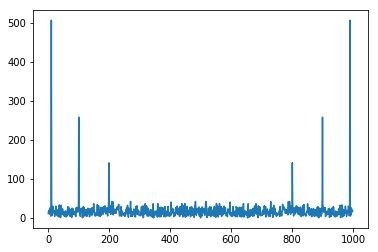

In [37]:
vt_lm = dft_lm(signal)
p.plot(np.abs(vt_lm))

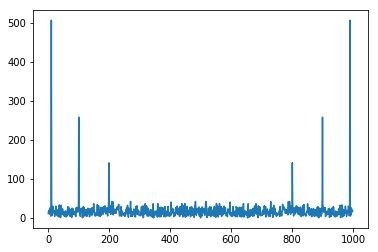

In [38]:
p.plot(np.abs(vt_q))

In [46]:
%%timeit
vt_q = qdft(signal)

1 loop, best of 5: 284 ms per loop


In [51]:
%%timeit
vt = dft(signal)

10 loops, best of 5: 77.5 ms per loop


In [47]:
%%timeit
vt_lm = dft_lm(signal)

1 loop, best of 5: 258 ms per loop


In [9]:
%%timeit
vt_fft = np.fft.fft(signal)

The slowest run took 19.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.9 µs per loop


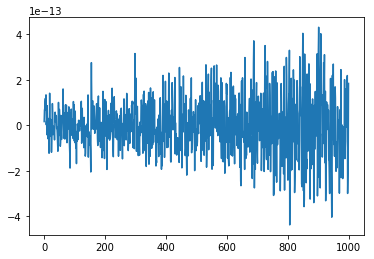

In [10]:
p.plot(np.real(vtt-signal))

In [21]:
from scipy.io import wavfile
rate, data = wavfile.read("Recording_1")

In [25]:
len(np.shape(data))

1

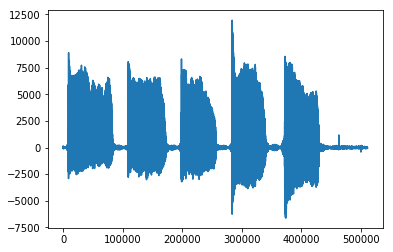

In [12]:
p.plot(data)

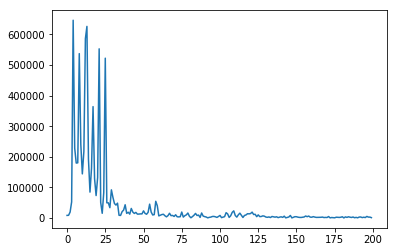

In [15]:
wav = data[300000:301000]
wavt = dft(wav)
p.plot(np.abs(wavt)[0:200])

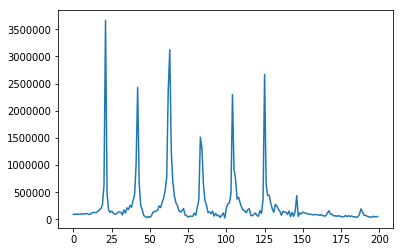

In [16]:
wav = data[300000:305000]
wavt = dft(wav)
p.plot(np.abs(wavt)[0:200])

In [19]:
if type("w") == str:
    print("si")

si
